# CATBOOST

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("gdrive/MyDrive/db/morganFP_rdkit.csv")
df

,Unnamed: 0,Title,IC50,SMILES,bit_id_0,bit_id_1,bit_id_2,bit_id_3,bit_id_4,bit_id_5,...,bit_id_2038,bit_id_2039,bit_id_2040,bit_id_2041,bit_id_2042,bit_id_2043,bit_id_2044,bit_id_2045,bit_id_2046,bit_id_2047
0,0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,36372,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36373,36373,CHEMBL109004,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36374,36374,CHEMBL2259758,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
36375,36375,CHEMBL109781,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df=pd.read_csv("gdrive/MyDrive/db/morganFP_rdkit.csv")
#df=pd.read_csv("gdrive/MyDrive/db/descriptor_data.csv")
df=pd.read_csv("gdrive/MyDrive/db/rdkit_2d.csv")
df=df[:36000]
data=df.drop(['Title', 'SMILES'], axis=1)
cols=data.columns[:42]
data=data[cols]
data=data.dropna()
nan_counts = data.isnull().sum()
nan_counts.sum()


0

In [ ]:
y=data['IC50']
data=data.drop(['IC50', 'Unnamed: 0'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.values,
    y.values,
    test_size=0.2,
    shuffle=True)




In [ ]:
X_train.shape

(28800, 40)

In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score
model = cb.CatBoostRegressor(iterations=4000, learning_rate=0.1,depth=6,loss_function='RMSE',eval_metric='RMSE', verbose=100)
model.fit(X_train,y_train, eval_set=(X_test, y_test))
y_pred = model.predict(X_test)

# Оценка MSE и R-квадрат
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

0:	learn: 7.0486006	test: 7.8159889	best: 7.8159889 (0)	total: 53.4ms	remaining: 3m 33s
100:	learn: 5.9432331	test: 6.9867758	best: 6.9867758 (100)	total: 2.43s	remaining: 1m 33s
200:	learn: 5.4432769	test: 6.7956761	best: 6.7956761 (200)	total: 5.42s	remaining: 1m 42s
300:	learn: 5.0795474	test: 6.6692855	best: 6.6692855 (300)	total: 8.27s	remaining: 1m 41s
400:	learn: 4.7986320	test: 6.5951257	best: 6.5951257 (400)	total: 9.83s	remaining: 1m 28s
500:	learn: 4.5402905	test: 6.5109801	best: 6.5109801 (500)	total: 11.4s	remaining: 1m 19s
600:	learn: 4.3372865	test: 6.4595318	best: 6.4595318 (600)	total: 12.9s	remaining: 1m 13s
700:	learn: 4.1618084	test: 6.4165432	best: 6.4165432 (700)	total: 14.5s	remaining: 1m 8s
800:	learn: 4.0168585	test: 6.3848102	best: 6.3846636 (795)	total: 16.1s	remaining: 1m 4s
900:	learn: 3.8955999	test: 6.3642504	best: 6.3640820 (896)	total: 17.7s	remaining: 1m
1000:	learn: 3.7897290	test: 6.3495718	best: 6.3494207 (998)	total: 21s	remaining: 1m 3s
1100:	lear

In [ ]:
r2

0.3825472870282792

In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 24.0 MB/s eta 0:00:00


In [ ]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 16.8 MB/s eta 0:00:00


In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd


raw=pd.read_excel("gdrive/MyDrive/db/19_35000.xlsx")
raw

Mounted at /content/gdrive


,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
...,...,...,...,...
36372,NaN,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...
36373,NaN,CHEMBL109004,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O
36374,NaN,CHEMBL2259758,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,NaN,CHEMBL109781,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O


In [ ]:
mlen = 0
f = ''
for i in raw['SMILES']:
  if len(i)>mlen:
    mlen = len(i)
    f = i
print(mlen,f)

281 c1cc(O2)c(Cl)cc1[C@@H](O)[C@@H](NC(=O)[C@H](NC)CC(C)C)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@@H](C(=O)N3)c(c4)cc2c(O[C@H](O5)[C@@H]([C@@H](O)[C@H](O)[C@H]5CO)O[C@@H](C6)O[C@@H](C)[C@@H](O)[C@@]6(C)N)c4Oc(cc7)c(Cl)cc7[C@@H](O)[C@H](NC(=O)[C@H]3c(c8)ccc(c8c19)O)C(=O)N[C@H](C(=O)O)c9cc(O)cc1O


{'whiskers': [<matplotlib.lines.Line2D at 0x7d517d331e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7d51b6415450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d517d332ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d51b726f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d517d3d81c0>],
 'means': []}

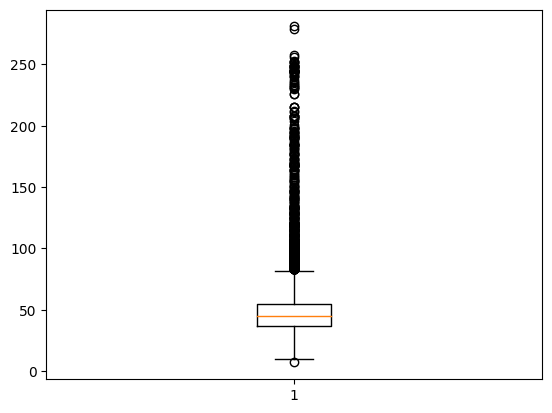

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x=lens)

In [ ]:
len('c1cccc(c12)ccc(c2)CC(=O)N/C(=N\[H])N[C@@H](C=C3C(=O)O)[C@@H](NC(=O)C)[C@@H](O3)[C@H](O)[C@H](O)CO')

97

In [ ]:
smiles = []
ic50 = []
for i in range(len(raw['SMILES'])):
  j = raw['SMILES'][i]
  m = raw['IC50'][i]
  if len(j)<90:
    smiles.append(j)
    ic50.append(m)

In [ ]:
len(ic50)

35381

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd


df=pd.read_csv("gdrive/MyDrive/db/morganFP_rdkit.csv")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MoleculeDataset(Dataset):
    def __init__(self, smiles, ic50):
        self.smiles = smiles
        self.ic50 = ic50

    def __len__(self):
        return len(self.smiles)

    def __getitem__(self, idx):
        mol = Chem.MolFromSmiles(self.smiles[idx])
        features = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=200)
        features = np.array(features, dtype=np.float32)

        return {
            'features': torch.tensor(features),
            'ic50': torch.tensor(self.ic50[idx])
        }

class Model(nn.Module):
    def __init__(self, num_features, hidden_size=128):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(num_features, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, features):
        x = self.relu(self.fc1(features))
        x = self.relu(self.fc2(x))
        output = self.fc3(x)
        return output

def train_model(model, dataloader, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        model.train()
        for batch in dataloader:
            features = batch['features'].to(device)
            ic50 = batch['ic50'].to(device)

            optimizer.zero_grad()
            output = model(features)
            loss = criterion(output.squeeze(), ic50)
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

def test_model(model, dataloader, criterion):
    model.eval()
    predictions = []
    true_values = []
    with torch.no_grad():
        for batch in dataloader:
            features = batch['features'].to(device)
            ic50 = batch['ic50'].to(device)

            output = model(features)
            predictions.extend(output.squeeze().cpu().tolist())
            true_values.extend(ic50.cpu().tolist())

    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    print(f'MSE: {mse:.4f}, R2: {r2:.4f}')

# Загрузка данных
raw=df[:36000]
smiles = []
ic50 = []
for i in range(len(raw['SMILES'])):
  j = raw['SMILES'][i]
  m = raw['IC50'][i]
  if len(j)<80:
    smiles.append(j)
    ic50.append(float(m))
#torch.tensor(ic50,dtype=torch.float64)

smiles_train, smiles_test, ic50_train, ic50_test = train_test_split(
    smiles, ic50, test_size=0.2, random_state=42
)

train_dataset = MoleculeDataset(smiles_train, ic50_train)
test_dataset = MoleculeDataset(smiles_test, ic50_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = Model(num_features=200).to(device)

optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()

train_model(model, train_dataloader, optimizer, criterion, epochs=10)

test_model(model, test_dataloader, criterion)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/10, Loss: 56.4584
Epoch 2/10, Loss: 6.9272
Epoch 3/10, Loss: 55.2968
Epoch 4/10, Loss: 100.3240
Epoch 5/10, Loss: 5.8991
Epoch 6/10, Loss: 9.5632
Epoch 7/10, Loss: 5.2827
Epoch 8/10, Loss: 7.0111
Epoch 9/10, Loss: 140.9571
Epoch 10/10, Loss: 8.7713
MSE: 27.4143, R2: 0.4137


In [ ]:
mol = [Chem.MolFromSmiles(i) for i in df['SMILES']]
features = [np.array(AllChem.GetMorganFingerprintAsBitVect(i, 2, nBits=200), dtype=np.float32) for i in mol]
features

[13:07:23] Conflicting single bond directions around double bond at index 55.
[13:07:23]   BondStereo set to STEREONONE and single bond directions set to NONE.
[13:07:30] Conflicting single bond directions around double bond at index 7.
[13:07:30]   BondStereo set to STEREONONE and single bond directions set to NONE.


[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0.,

In [ ]:
#test = pd.DataFrame(features)
test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36372,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36374,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in test:
  if len(test[i].value_counts())<2:
    print('one stolbets', i)

In [ ]:
import seaborn as sns
cor = test.corr()

1.0
-0.04138592331361253
-0.006678562050202148
-0.016338201403166663
0.015555686778661874
-0.04688804017492194
-0.032033587438776864
0.07209847353070223
0.038015748110621354
0.030033715408351744
0.06717664715592235
-0.02242529795687666
0.12539874940799692
0.11431039689968309
0.005665993853000949
-0.08494034294600754
-0.07528863185521859
0.004396314614243883
-0.00850328903271292
-0.01899903645914928
0.006231036060680432
0.018447260223240777
0.038411216891750644
-0.004955001319529923
-0.004400969271013544
0.007525295652071543
0.027563919059521474
0.007097529851372231
0.01849899170432864
0.0113565967280468
0.045642595822543625
0.0010253073798357744
0.198634731206952
0.016484302358164032
0.006880373488520187
-0.020248296842841462
0.0013345852630812906
-0.001976931378759409
-0.04873701875765061
0.021656894424712213
-0.02008947983977834
0.001326955853063832
0.03986549526470031
0.014422559080155483
-0.028216437210216657
-0.031774994040286074
-0.02033093897860632
0.008649672029143364
0.0391482

In [ ]:
to_drop = []
for i in cor:
  c = -1
  for j in cor[i]:
    c+=1
    if c==i:
      continue
    if abs(j)>0.6:
      to_drop.append(c)
len(to_drop)

2

In [ ]:
len(features)

200

In [ ]:
torch.tensor(ic50,dtype=torch.float64)

<ipython-input-14-2a6c48d6d4d1>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(ic50,dtype=torch.float64)


tensor([1.4500e-05, 1.5900e-05, 3.3400e-05,  ..., 8.8826e+01, 8.8900e+01,
        8.8900e+01], dtype=torch.float64)